In [4]:
import os
import shutil
import random

random.seed(42)

new_base_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset"

# Split ratios (80_10_10, 60_20_20)
split_ratios = {
    "split_80_10_10": (0.8, 0.1, 0.1),
    "split_60_20_20": (0.6, 0.2, 0.2)
}

def get_image_files(dataset_dir):
    image_files = []
    for root, dirs, files in os.walk(dataset_dir):  
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg', '.tiff', '.bmp')):
                image_files.append(os.path.join(root, file))
    return image_files

existing_train_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train"
existing_valid_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\valid"
existing_test_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\test"

train_images = get_image_files(existing_train_dir)
valid_images = get_image_files(existing_valid_dir)
test_images = get_image_files(existing_test_dir)

all_images = train_images + valid_images + test_images

# image split
def split_data(image_list, train_ratio, valid_ratio, test_ratio):
    random.shuffle(image_list)
    total_count = len(image_list)
    
    train_size = int(total_count * train_ratio)
    valid_size = int(total_count * valid_ratio)
    test_size = total_count - train_size - valid_size

    train_set = image_list[:train_size]
    valid_set = image_list[train_size:train_size + valid_size]
    test_set = image_list[train_size + valid_size:]
    
    return train_set, valid_set, test_set

for split_name, (train_ratio, valid_ratio, test_ratio) in split_ratios.items():
    for dataset_type in ["train", "valid", "test"]:
        os.makedirs(os.path.join(new_base_dir, split_name, dataset_type, "images"), exist_ok=True)
        os.makedirs(os.path.join(new_base_dir, split_name, dataset_type, "annotations"), exist_ok=True)

    train_files, valid_files, test_files = split_data(all_images, train_ratio, valid_ratio, test_ratio)

    # XML split
    def copy_files(files, dataset_type):
        for file in files:
            image_name = os.path.basename(file)
            dst_img = os.path.join(new_base_dir, split_name, dataset_type, "images", image_name)
            shutil.copy(file, dst_img)

            xml_file = os.path.splitext(image_name)[0] + ".xml"  
            src_xml_dir = os.path.join(os.path.dirname(file).replace("images", "annotations"))  
            src_xml = os.path.join(src_xml_dir, xml_file) 
            dst_xml = os.path.join(new_base_dir, split_name, dataset_type, "annotations", xml_file)

            print(f"Looking for XML file: {src_xml}")
            
            if os.path.exists(src_xml):
                shutil.copy(src_xml, dst_xml)
            else:
                print(f"Warning: XML for {image_name} not found!")

    copy_files(train_files, "train")
    copy_files(valid_files, "valid")
    copy_files(test_files, "test")

    print(f"\nSplit method: {split_name}")
    print(f"  -> Train: {len(train_files)} images")
    print(f"  -> Valid: {len(valid_files)} images")
    print(f"  -> Test: {len(test_files)} images")

print("\n Dataset splitting completed!")


Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train\annotations\train_0087.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train\annotations\train_2992.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train\annotations\train_3183.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\valid\annotations\valid_0906.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train\annotations\train_2885.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\train\annotations\train_0118.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\valid\annotations\valid_0708.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10\valid\annotations\valid_0799.xml
Looking for XML file: C:\Users\xiaog\Desktop\Project\Dat

In [1]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10'

save_dir = os.path.join(dataset_dir, 'dataset_comparison')
os.makedirs(save_dir, exist_ok=True)

defective_images = []
non_defective_images = []

subsets = ['train', 'valid', 'test']

for subset in subsets:
    images_dir = os.path.join(dataset_dir, subset, 'images')
    annotations_dir = os.path.join(dataset_dir, subset, 'annotations')

    for image_name in os.listdir(images_dir):
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue 
        
        base_name = os.path.splitext(image_name)[0]
        xml_path = os.path.join(annotations_dir, base_name + '.xml')

        if not os.path.exists(xml_path):
            continue 

        tree = ET.parse(xml_path)
        root = tree.getroot()

        objects = root.findall('object')

        image_path = os.path.join(images_dir, image_name)
        if len(objects) > 0:
            defective_images.append(image_path)
        else:
            non_defective_images.append(image_path)

# num_samples = 5  
# sample_defective = defective_images[:num_samples]
# sample_non_defective = non_defective_images[:num_samples]

plt.figure(figsize=(15, 6))

for i, img_path in enumerate(sample_defective):
    image = Image.open(img_path)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Defective')
    plt.axis('off')

for i, img_path in enumerate(sample_non_defective):
    image = Image.open(img_path)
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(image, cmap='gray')
    plt.title('Non-Defective')
    plt.axis('off')

plt.tight_layout()

save_path = os.path.join(save_dir, 'defective_vs_non_defective.png')
plt.savefig(save_path, dpi=300)
plt.close()

print(f"Path：{save_path}")


NameError: name 'sample_defective' is not defined

<Figure size 1500x600 with 0 Axes>

Defective：4733
Non-Defective：619


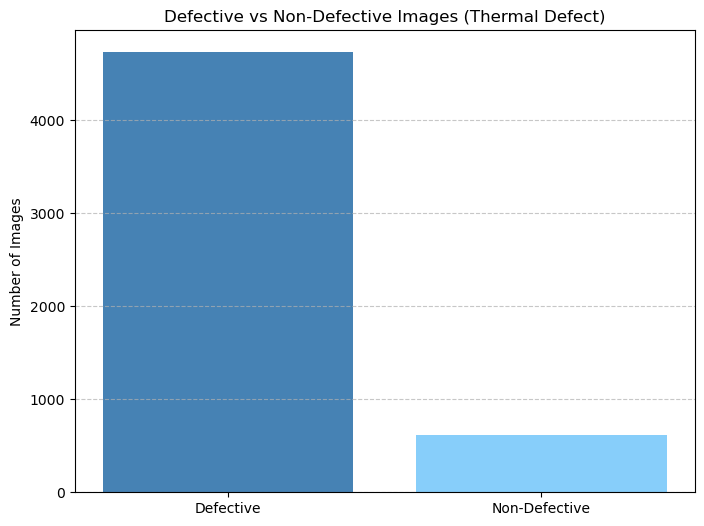

Path：C:\Users\xiaog\Desktop\Project\Datasets\dataset\defective_vs_non_defective_count.png


In [6]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

dataset_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\split_70_20_10'

save_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset'
os.makedirs(save_dir, exist_ok=True)

defective_count = 0
non_defective_count = 0

subsets = ['train', 'valid', 'test']

for subset in subsets:
    images_dir = os.path.join(dataset_dir, subset, 'images')
    annotations_dir = os.path.join(dataset_dir, subset, 'annotations')

    for image_name in os.listdir(images_dir):
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue  

        base_name = os.path.splitext(image_name)[0]
        xml_path = os.path.join(annotations_dir, base_name + '.xml')

        if os.path.exists(xml_path):   
            tree = ET.parse(xml_path)
            root = tree.getroot()

            objects = root.findall('object')

            has_thermal_defect = False  

            for obj in objects:
                name = obj.find('name').text
                if name.strip().lower() == 'thermal_defect': 
                    has_thermal_defect = True
                    break

            if has_thermal_defect:
                defective_count += 1
            else:
                non_defective_count += 1
        else:
          
            print(f"Warning: Annotation file not found for {image_name}")

print(f"Defective：{defective_count}")
print(f"Non-Defective：{non_defective_count}")

labels = ['Defective', 'Non-Defective']
counts = [defective_count, non_defective_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['#4682B4', '#87CEFA']) 
plt.title('Defective vs Non-Defective Images (Thermal Defect)')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)

save_path = os.path.join(save_dir, 'defective_vs_non_defective_count.png')
plt.savefig(save_path, dpi=600)
plt.show()
plt.close()

print(f"Path：{save_path}")
